In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
from scipy import stats
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
from collections import defaultdict


In [7]:
RECOMPUTE_DATA = False

In [8]:
models = [
    "gpt2",
    "gpt2-medium",
    "gpt2-large",
    "gpt2-xl",
    "opt-125m",
    "opt-1.3b",
    "opt-2.7b",
    "opt-6.7b",
    "opt-13b",
    "opt-30b",
    "opt-66b",
    "pythia-14m",
    'pythia-31m',
    "pythia-70m-deduped",
    "pythia-160m-deduped",
    "pythia-410m-deduped",
    "pythia-1b-deduped",
    "pythia-1.4b-deduped",
    "pythia-2.8b-deduped",
    "pythia-6.9b-deduped",
    "pythia-12b-deduped",
]

multilingual_models = [
    "xglm-564M",
    "xglm-1.7B",
    "xglm-2.9B",
    "xglm-4.5B",
    "xglm-7.5B",    
]

tuned_models = [
    "gpt2",
    "gpt2-large",
    "gpt2-xl",
    "opt-125m",
    "opt-1.3b",
    "opt-6.7b",
    "pythia-70m-deduped",
    "pythia-160m-deduped",
    "pythia-410m-deduped",
    "pythia-1b-deduped-v0",
    "pythia-1.4b-deduped",
    "pythia-2.8b-deduped",
    "pythia-6.9b-deduped",
    "pythia-12b-deduped",
]

models2params ={
"gpt2": 124000000,
"gpt2-medium": 345000000,
"gpt2-large": 774000000,
"gpt2-xl": 1558000000,
"opt-125m": 125000000,
"opt-1.3b": 1300000000,
"opt-2.7b": 2700000000,
"opt-6.7b": 6700000000,
"opt-13b": 13000000000,
"opt-30b": 30000000000,
"opt-66b": 66000000000,
"pythia-14m": 14000000,
"pythia-31m": 31000000,
"pythia-70m-deduped": 70000000,
"pythia-160m-deduped": 160000000,
"pythia-410m-deduped": 410000000,
"pythia-1b-deduped": 1000000000,
"pythia-1b-deduped-v0": 1000000000,
"pythia-1.4b-deduped": 1400000000,
"pythia-2.8b-deduped": 2800000000,
"pythia-6.9b-deduped": 6900000000,
"pythia-12b-deduped": 12000000000,
"xglm-564M": 564000000,
"xglm-1.7B": 1700000000,
"xglm-2.9B": 2900000000,
"xglm-4.5B": 4500000000,
"xglm-7.5B": 7500000000,
}

models2family = {
    "gpt2": "gpt2",
    "gpt2-medium": "gpt2",
    "gpt2-large": "gpt2",
    "gpt2-xl": "gpt2",
    "opt-125m": "opt",
    "opt-1.3b": "opt",
    "opt-2.7b": "opt",
    "opt-6.7b": "opt",
    "opt-13b": "opt",
    "opt-30b": "opt",
    "opt-66b": "opt",
    "pythia-14m": "pythia",
    "pythia-31m": "pythia",
    "pythia-70m-deduped": "pythia",
    "pythia-160m-deduped": "pythia",
    "pythia-410m-deduped": "pythia",
    "pythia-1b-deduped": "pythia",
    "pythia-1b-deduped-v0": "pythia",
    "pythia-1.4b-deduped": "pythia",
    "pythia-2.8b-deduped": "pythia",
    "pythia-6.9b-deduped": "pythia",
    "pythia-12b-deduped": "pythia",
    "xglm-564M": "xglm",
    "xglm-1.7B": "xglm",
    "xglm-2.9B": "xglm",
    "xglm-4.5B": "xglm",
    "xglm-7.5B": "xglm",   
}
models2color = {
    "gpt2": "darkblue",
    "gpt2-medium": "darkblue",
    "gpt2-large": "darkblue",
    "gpt2-xl": "darkblue",
    "opt-125m": "darkgreen",
    "opt-1.3b": "darkgreen",
    "opt-2.7b": "darkgreen",
    "opt-6.7b": "darkgreen",
    "opt-13b": "darkgreen",
    "opt-30b": "darkgreen",
    "opt-66b": "darkgreen",
    "pythia-14m": "darkorange",
    "pythia-31m": "darkorange",
    "pythia-70m-deduped": "darkorange",
    "pythia-160m-deduped": "darkorange",
    "pythia-410m-deduped": "darkorange",
    "pythia-1b-deduped": "darkorange",
    "pythia-1b-deduped-v0": "darkorange",
    "pythia-1.4b-deduped": "darkorange",
    "pythia-2.8b-deduped": "darkorange",
    "pythia-6.9b-deduped": "darkorange",
    "pythia-12b-deduped": "darkorange",
    "xglm-564M": "darkblue",
    "xglm-1.7B": "darkblue",
    "xglm-2.9B": "darkblue",
    "xglm-4.5B": "darkblue",
    "xglm-7.5B": "darkblue",
}

models2size = {
    "gpt2": 10,
    "gpt2-medium": 20,
    "gpt2-large": 30,
    "gpt2-xl": 40,
    "opt-125m": 10,
    "opt-1.3b": 40,
    "opt-2.7b": 50,
    "opt-6.7b": 60,
    "opt-13b": 70,
    "opt-30b": 80,
    "opt-66b": 90,
    "pythia-14m": 8,
    "pythia-31m": 12,
    "pythia-70m-deduped": 15,
    "pythia-160m-deduped": 20,
    "pythia-410m-deduped": 30,
    "pythia-1b-deduped": 40,
    "pythia-1b-deduped-v0": 40,
    "pythia-1.4b-deduped": 40,
    "pythia-2.8b-deduped": 50,
    "pythia-6.9b-deduped": 60,
    "pythia-12b-deduped": 70,
    "xglm-564M": 20,
    "xglm-1.7B": 30,
    "xglm-2.9B": 40,
    "xglm-4.5B": 50,
    "xglm-7.5B": 60,
}

model2marker={
    "gpt2": "o",
    "gpt2-medium": "o",
    "gpt2-large": "o",
    "gpt2-xl": "o",
    "opt-125m": "s",
    "opt-1.3b": "s",
    "opt-2.7b": "s",
    "opt-6.7b": "s",
    "opt-13b": "s",
    "opt-30b": "s",
    "opt-66b": "s",
    "pythia-14m": "D",
    "pythia-31m": "D",
    "pythia-70m-deduped": "D",
    "pythia-160m-deduped": "D",
    "pythia-410m-deduped": "D",
    "pythia-1b-deduped": "D",
    "pythia-1b-deduped-v0": "D",
    "pythia-1.4b-deduped": "D",
    "pythia-2.8b-deduped": "D",
    "pythia-6.9b-deduped": "D",
    "pythia-12b-deduped": "D",
    "xglm-564M": "s",
    "xglm-1.7B": "s",
    "xglm-2.9B": "s",
    "xglm-4.5B": "s",
    "xglm-7.5B": "s",
}

all_datasets = [
 'NS_time',
 'NS_time_last_token',
 'NS_MAZE_time',
 'NS_MAZE_time_last_token',
 'DC_time',
 'DC_time_last_token',
 'Fillers_SPR_RT',
 'Fillers_SPR_RT_last_token',
 'Fillers_FPRT',
 'Fillers_FPRT_last_token',
 'Fillers_MAZE_RT',
 'Fillers_MAZE_RT_last_token',
 'M_N400_all',
 'M_N400_C3',
 'M_N400_C4',
 'M_N400_CP3',
 'M_N400_CP4',
 'M_N400_CPz',
 'M_N400_Cz',
 'M_N400_P3',
 'M_N400_P4',
 'M_N400_Pz',
 'S_N400_Federmeier_et_al._(2007)',
 'S_N400_Hubbard_et_al._(2019)',
 'S_N400_Szewczyk_&_Federmeier_(2022)',
 'S_N400_Szewczyk_et_al._(2022)',
 'S_N400_Wlotko_&_Federmeier_(2012)',
 'UCL_ELAN',
 'UCL_ELAN_last_token',
 'UCL_EPNP',
 'UCL_EPNP_last_token',
'UCL_LAN',
'UCL_LAN_last_token',
'UCL_N400',
'UCL_N400_last_token',
'UCL_P600',
'UCL_P600_last_token',
'UCL_PNP',
'UCL_PNP_last_token',
'UCL_RTfirstpass',
'UCL_RTreread',
'UCL_RTgopast',
'UCL_self_paced_reading_time',
'UCL_RTfirstpass_last_token',
'UCL_RTreread_last_token',
'UCL_RTgopast_last_token',
'UCL_self_paced_reading_time_last_token',
'ZuCO_time',
'ZuCO_N400'
]

data2method = {
    'NS_time': 'SPR',
    'NS_time_last_token': 'SPR',
    'NS_MAZE_time': 'MAZE',
    'NS_MAZE_time_last_token': 'MAZE',
    'DC_time': 'FPGD',
    'DC_time_last_token': 'FPGD',
    'Fillers_SPR_RT': 'SPR',
    'Fillers_FPRT': 'FPGD',
    'Fillers_MAZE_RT': 'MAZE',
    'Fillers_SPR_RT_last_token': 'SPR',
    'Fillers_FPRT_last_token': 'FPGD',
    'Fillers_RRT_last_token': 'SPGD',
    'Fillers_MAZE_RT_last_token': 'MAZE',
    'M_N400_C3': 'N400',
    'M_N400_C4': 'N400',
    'M_N400_CP3': 'N400',
    'M_N400_CP4': 'N400',
    'M_N400_CPz': 'N400',
    'M_N400_Cz': 'N400',
    'M_N400_P3': 'N400',
    'M_N400_P4': 'N400',
    'M_N400_Pz': 'N400',
    'M_N400_all': 'N400',
    'S_N400_Federmeier_et_al._(2007)': 'N400',
    'S_N400_Hubbard_et_al._(2019)': 'N400',
    'S_N400_Szewczyk_&_Federmeier_(2022)': 'N400',
    'S_N400_Szewczyk_et_al._(2022)': 'N400',
    'S_N400_Wlotko_&_Federmeier_(2012)': 'N400',
    'UCL_ELAN': 'ELAN',
    'UCL_ELAN_last_token': 'ELAN',
    'UCL_EPNP': 'EPNP',
    'UCL_EPNP_last_token': 'EPNP',
    'UCL_LAN': 'LAN',
    'UCL_LAN_last_token': 'LAN',
    'UCL_N400': 'N400',
    'UCL_N400_last_token': 'N400',
    'UCL_P600': 'P600',
    'UCL_P600_last_token': 'P600',
    'UCL_PNP': 'PNP',
    'UCL_PNP_last_token': 'PNP',
    'UCL_RTfirstpass': 'FPGD',
    'UCL_RTreread': 'SPGD',
    'UCL_RTgopast': 'GP',
    'UCL_self_paced_reading_time': 'SPR',
    'UCL_RTfirstpass_last_token': 'FPGD',
    'UCL_RTreread_last_token': 'SPGD',
    'UCL_RTgopast_last_token': 'GP',
    'UCL_self_paced_reading_time_last_token': 'SPR',
    "du_time": "Du",
    "ee_time": "Ee",
    "en_time": "En",
    "fi_time": "Fi",
    "ge_time": "Ge",
    "gr_time": "Gr",
    "he_time": "He",
    "it_time": "It",
    "ko_time": "Ko",
    "no_time": "No",
    "ru_time": "Ru",
    "sp_time": "Sp",
    "tr_time": "Tr",
    "ZuCO_time": "FPGD",
    "ZuCO_N400": "N400",
    }

data2cite = {
    'NS_time': '~\cite{Futrell2021-wr}',
    'NS_time_last_token': '~\cite{Futrell2021-wr}',
    'NS_MAZE_time': '~\cite{Boyce2023AmazeON}',
    'NS_MAZE_time_last_token': '~\cite{Boyce2023AmazeON}',
    'DC_time': '~\cite{kennedy2003dundee}',
    'DC_time_last_token': '~\cite{kennedy2003dundee}',
    'Fillers_SPR_RT': '~\cite{Vasishth2010-ji}',
    'Fillers_FPRT': '~\cite{Vasishth2010-ji}',
    'Fillers_MAZE_RT': '~\cite{Hahn2022-ib}',
    'Fillers_SPR_RT_last_token': '~\cite{Vasishth2010-ji}',
    'Fillers_FPRT_last_token': '~\cite{Vasishth2010-ji}',
    'Fillers_MAZE_RT_last_token': '~\cite{Hahn2022-ib}',
    'M_N400_C3': '~\cite{michaelov2023strong}',
    'M_N400_C4': '~\cite{michaelov2023strong}',
    'M_N400_CP3': '~\cite{michaelov2023strong}',
    'M_N400_CP4': '~\cite{michaelov2023strong}',
    'M_N400_CPz': '~\cite{michaelov2023strong}',
    'M_N400_Cz': '~\cite{michaelov2023strong}',
    'M_N400_P3': '~\cite{michaelov2023strong}',
    'M_N400_P4': '~\cite{michaelov2023strong}',
    'M_N400_Pz': '~\cite{michaelov2023strong}',
    'M_N400_all': '~\cite{michaelov2023strong}',
    'S_N400_Federmeier_et_al._(2007)': '~\cite{Federmeier2007-qg}',
    'S_N400_Hubbard_et_al._(2019)': '~\cite{Hubbard2019-vz}',
    'S_N400_Szewczyk_&_Federmeier_(2022)': '~\cite{Szewczyk2022-ds}',
    'S_N400_Szewczyk_et_al._(2022)': '~\cite{Szewczyk2022-cd}',
    'S_N400_Wlotko_&_Federmeier_(2012)': '~\cite{Wlotko2012-eh}',
    'UCL_ELAN': '~\cite{FRANK20151}',
    'UCL_ELAN_last_token': '~\cite{FRANK20151}',
    'UCL_EPNP': '~\cite{FRANK20151}',
    'UCL_EPNP_last_token': '~\cite{FRANK20151}',
    'UCL_LAN': '~\cite{FRANK20151}',
    'UCL_LAN_last_token': '~\cite{FRANK20151}',
    'UCL_N400': '~\cite{FRANK20151}',
    'UCL_N400_last_token': '~\cite{FRANK20151}',
    'UCL_P600': '~\cite{FRANK20151}',
    'UCL_P600_last_token': '~\cite{FRANK20151}',
    'UCL_PNP': '~\cite{FRANK20151}',
    'UCL_PNP_last_token': '~\cite{FRANK20151}',
    'UCL_RTfirstpass': '~\cite{frank2013reading}',
    'UCL_RTreread': '~\cite{frank2013reading}',
    'UCL_RTgopast': '~\cite{frank2013reading}',
    'UCL_self_paced_reading_time': '~\cite{frank2013reading}',
    'UCL_RTfirstpass_last_token': '~\cite{frank2013reading}',
    'UCL_RTreread_last_token': '~\cite{frank2013reading}',
    'UCL_RTgopast_last_token': '~\cite{frank2013reading}',
    'UCL_self_paced_reading_time_last_token': '~\cite{frank2013reading}',
    "du_time": "~\cite{siegelman2022expanding}",
    "ee_time": "~\cite{siegelman2022expanding}",
    "en_time": "~\cite{siegelman2022expanding}",
    "fi_time": "~\cite{siegelman2022expanding}",
    "ge_time": "~\cite{siegelman2022expanding}",
    "gr_time": "~\cite{siegelman2022expanding}",
    "he_time": "~\cite{siegelman2022expanding}",
    "it_time": "~\cite{siegelman2022expanding}",
    "ko_time": "~\cite{siegelman2022expanding}",
    "no_time": "~\cite{siegelman2022expanding}",
    "ru_time": "~\cite{siegelman2022expanding}",
    "sp_time": "~\cite{siegelman2022expanding}",
    "tr_time": "~\cite{siegelman2022expanding}",
    "ZuCO_time": "~\cite{Hollenstein2018-rm}",
    "ZuCO_N400": "~\cite{Hollenstein2018-rm}",
}

data2stimuli = {
    'NS_time': 'NS',
    'NS_time_last_token': 'NS',
    'NS_MAZE_time': 'NS',
    'NS_MAZE_time_last_token': 'NS',
    'DC_time': 'DC',
    'DC_time_last_token': 'DC',
    'Fillers_SPR_RT': 'Fillers',
    'Fillers_FPRT': 'Fillers',
    'Fillers_MAZE_RT': 'Fillers',
    'Fillers_SPR_RT_last_token': 'Fillers',
    'Fillers_FPRT_last_token': 'Fillers',
    'Fillers_MAZE_RT_last_token': 'Fillers',
    'M_N400_C3': 'Michaelov+,\n2024',
    'M_N400_C4': 'Michaelov+,\n2024',
    'M_N400_CP3': 'Michaelov+,\n2024',
    'M_N400_CP4': 'Michaelov+,\n2024',
    'M_N400_CPz': 'Michaelov+,\n2024',
    'M_N400_Cz': 'Michaelov+,\n2024',
    'M_N400_P3': 'Michaelov+,\n2024',
    'M_N400_P4': 'Michaelov+,\n2024',
    'M_N400_Pz': 'Michaelov+,\n2024',
    'M_N400_all': 'Michaelov+,\n2024',
    'S_N400_Federmeier_et_al._(2007)': 'Federmeier+,\n2007',
    'S_N400_Hubbard_et_al._(2019)': 'Hubbard+,\n2019',
    'S_N400_Szewczyk_&_Federmeier_(2022)': 'S&F,2022',
    'S_N400_Szewczyk_et_al._(2022)': 'Szewczyk+,\n2022',
    'S_N400_Wlotko_&_Federmeier_(2012)': 'W&F,2012',
    'UCL_ELAN': 'UCL',
    'UCL_ELAN_last_token': 'UCL',
    'UCL_EPNP': 'UCL',
    'UCL_EPNP_last_token': 'UCL',
    'UCL_LAN': 'UCL',
    'UCL_LAN_last_token': 'UCL',
    'UCL_N400': 'UCL',
    'UCL_N400_last_token': 'UCL',
    'UCL_P600': 'UCL',
    'UCL_P600_last_token': 'UCL',
    'UCL_PNP': 'UCL',
    'UCL_PNP_last_token': 'UCL',
    'UCL_RTfirstpass': 'UCL',
    'UCL_RTreread': 'UCL',
    'UCL_RTgopast': 'UCL',
    'UCL_self_paced_reading_time': 'UCL',
    'UCL_RTfirstpass_last_token': 'UCL',
    'UCL_RTreread_last_token': 'UCL',
    'UCL_RTgopast_last_token': 'UCL',
    'UCL_self_paced_reading_time_last_token': 'UCL',
    "du_time": "MECO",
    "ee_time": "MECO",
    "en_time": "MECO",
    "fi_time": "MECO",
    "ge_time": "MECO",
    "gr_time": "MECO",
    "he_time": "MECO",
    "it_time": "MECO",
    "ko_time": "MECO",
    "no_time": "MECO",
    "ru_time": "MECO",
    "sp_time": "MECO",
    "tr_time": "MECO",
    "ZuCO_time": "ZuCO",
    "ZuCO_N400": "ZuCO",
}

In [12]:
import math

def get_results(models, dir, metric, target, normalize_x=True, avg_result=False, more_features=False):
    all_data = []
    all_average_data = []
    for i, model in enumerate(models):
        if more_features:
            files = glob.glob(f"{dir}/{model}/{metric}*layer*.{target}.more_features")
        else:
            files = glob.glob(f"{dir}/{model}/{metric}*layer*.{target}")
        if not files:
            continue
        for file in files:
            layer = file.split("layer")[-1].split(".")[0]
            model = file.split("/")[-2]
            data = file.split("/")[-3]
            method = file.split("/")[-4]
            data_name = f"{data}_{target}".strip("_")
            if layer == 0:
                continue
            with open(file, "r") as f:
                result_text = f.readlines()
                loglik = result_text[1].strip().split()[-1]
                ppl = result_text[2].strip().split()[-1]
            if layer == "Average":
                all_average_data.append({"data": data_name, "model": model, "method": method, "loglik": float(loglik), "ppl": float(ppl), "average_method": "surprisal_average"})
            else:
                all_data.append({"data": data_name, "model": model, "method": method, "layer": int(layer), "loglik": float(loglik), "ppl": float(ppl)})

    if avg_result:
        df = pd.DataFrame.from_records(all_data)
        df["max_layer"] = df.apply(lambda x: df[df["model"]==x["model"]]["layer"].max(), axis=1)
        df["last_ppl"] = df.apply(lambda x: df[(df["model"]==x["model"]) & (df["layer"]==x["max_layer"])]["ppl"].tolist()[0], axis=1)
        model2ppl = {}
        for row in df[["model", "last_ppl"]].drop_duplicates().iterrows():
            model2ppl[row[1]["model"]] = row[1]["last_ppl"]

        df = pd.DataFrame.from_records(all_average_data)
        df["measurement"] = data2method[data_name]
        df["name"] = data2stimuli[data_name]
        df["last_ppl"] = df.apply(lambda x: model2ppl[x["model"]], axis=1)
        return df
    else:
        df = pd.DataFrame.from_records(all_data)
        df["max_layer"] = df.apply(lambda x: df[df["model"]==x["model"]]["layer"].max(), axis=1)
        df["min_layer"] = df.apply(lambda x: df[df["model"]==x["model"]]["layer"].min(), axis=1)
        df["normalized_layer"] = df.apply(lambda x: float((x["layer"]-x["min_layer"])/(x["max_layer"]-x["min_layer"])), axis=1)
        df["measurement"] = data2method[data_name]
        df["name"] = data2stimuli[data_name]
        df["params"] = df.apply(lambda x: models2params[x["model"]], axis=1)
        df["log_params"] = df.apply(lambda x: math.log10(models2params[x["model"]]), axis=1)
        df["last_ppl"] = df.apply(lambda x: df[(df["model"]==x["model"]) & (df["layer"]==x["max_layer"])]["ppl"].tolist()[0], axis=1)
        df["last_ppp"] = df.apply(lambda x: df[(df["model"]==x["model"]) & (df["layer"]==x["max_layer"])]["loglik"].tolist()[0], axis=1)
        df["max_ppp"] = df.apply(lambda x: df[df["model"]==x["model"]]["loglik"].max(), axis=1)
        return df
        

KeyboardInterrupt: 

FileNotFoundError: [Errno 2] No such file or directory: 'figures/_gpt2_surprisal.pdf'

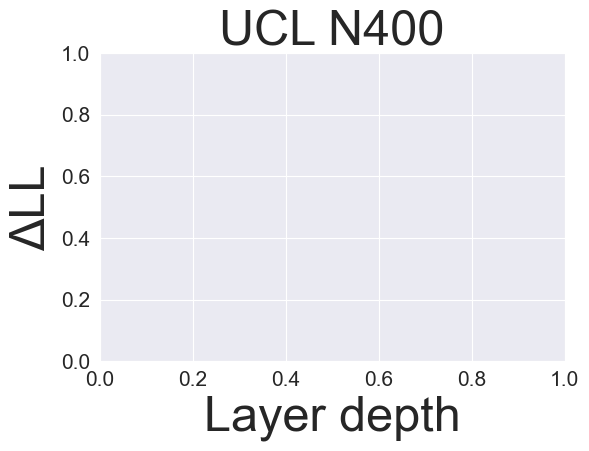

In [18]:
def visualize(models, dir, metric, target, normalize_x=True, family=[]):
    colors = sns.color_palette("colorblind", n_colors=len(models))
    plt.figure(figsize=(6, 4))
    all_X = []
    all_y = []
    all_models = []
    used_label = []
    for i, model in enumerate(models):
        if family and not [f for f in family if f in model]:
            continue
        files = glob.glob(f"{dir}/{model}/{metric}*layer*.{target}")
        if not files:
            continue
        layer2loglik = {}
        for file in files:
            layer = file.split("layer")[-1].split(".")[0]
            method = file.split("/")[-4]
            if layer == "Average":
                with open(file, "r") as f:
                    layer_avg_loglik = f.readlines()[1].strip().split()[-1]
                    layer_avg_loglik = float(layer_avg_loglik)
                continue
            elif layer == "0":
                continue
            else:
                layer = int(layer)
            with open(file, "r") as f:
                loglik = f.readlines()[1].strip().split()[-1]
            layer2loglik[layer] = float(loglik)
       
        layer2loglik = sorted(layer2loglik.items(), key=lambda x: x[0])
        X = list(map(lambda x: x[0], layer2loglik))
        y = list(map(lambda x: x[1], layer2loglik))
        normalized_X = [(x-min(X))/(max(X)-min(X)) for x in X]

        all_X.extend(normalized_X)
        all_y.extend(y)
        all_models.extend([models2family[model]]*len(y))
        if normalize_x:
            X = normalized_X

        plt.plot(X, y, color=models2color[model], alpha=0.3)
        label = models2family[model]
        if label in used_label:
            label = ""
        else:
            used_label.append(label)
        plt.plot(X,y, color=models2color[model],alpha=0.7)
        plt.scatter(X, y, color=models2color[model], label=model, s=models2size[model]*4, marker=model2marker[model], alpha=0.2)
        max_index = y.index(max(y))
        if max_index == len(X)-1:
            plt.scatter(X[-1], y[-1], color=models2color[model].replace("dark", ""), s=models2size[model]*12, marker=model2marker[model], alpha=0.7, edgecolors="red", linewidth=2, hatch="")
        else:
            plt.scatter(X[-1], y[-1], color=models2color[model].replace("dark", ""), s=models2size[model]*8, marker=model2marker[model], alpha=0.7, edgecolors="black", linewidth=2, hatch="")
        plt.scatter(X[max_index], y[max_index], color=models2color[model].replace("dark", ""), s=models2size[model]*8, marker=model2marker[model], alpha=0.7, edgecolors="red", linewidth=2, hatch="**")
    
    dataset_name = dir.split("/")[-1]
    method = "JOHN"
    image_file_name = ''
    if target:
        data_target = dataset_name + "_" + target
        # image_file_name = data_target + "_" + method
    else:
        data_target = dataset_name
        # image_file_name = data_target + "_" + method

    if family:
        image_file_name = image_file_name + "_" + "_".join(family)
    
    plt.title(f"{data2stimuli[data_target]} {data2method[data_target]}", fontsize=35)
    if normalize_x:
        plt.xlabel("Relative layer depth", fontsize=30)
    else:
        plt.xlabel("Layer depth", fontsize=35)
    plt.ylabel("ΔLL", fontsize=35)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(f"figures/{image_file_name}_{metric}.pdf", bbox_inches='tight')
    plt.show()
visualize(tuned_models, "../results_orig/logit-lens/UCL", "surprisal", target="N400", normalize_x=False, family=["gpt2"])

In [ ]:
def print_table(df, filter_model, data, details=False):
    layer_results = []
    df = df[~df["model"].isin(filter_model)]
    for d in data:
        print(d)
        for method in ["logit-lens", "tuned-lens"]:
            for r in [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1)]:
                sub_df = df[(df["data"]==d) & (df["method"]==method)]
                layer_results.append({"data": d, 
                                      "stimuli": data2stimuli[d],
                                    "method": method,
                                    "measurement": data2method[d],
                                    "name": data2method[d]+data2cite[d],
                                    "range": f"{r[0]}-{r[1]}",
                                    "PPP": sub_df[sub_df["normalized_layer"].between(r[0], r[1])]["loglik"].mean()*1000}
                                    )
    print()
    latex_df = pd.DataFrame.from_records(layer_results)[["stimuli", "name", "measurement", "method", "range", "PPP"]]
    latex_df.set_index("stimuli", inplace=True)
    latex_df = latex_df.loc[["NS", "DC", "UCL", "Fillers", "ZuCO", "Michaelov+,\n2024", "Federmeier+,\n2007", "W&F,2012", "Hubbard+,\n2019", "S&F,2022", "Szewczyk+,\n2022"]].reset_index()
    desired_order = ["NS", "DC", "UCL", "Fillers", "ZuCO", "Michaelov+,\n2024", "Federmeier+,\n2007", "W&F,2012", "Hubbard+,\n2019", "S&F,2022", "Szewczyk+,\n2022"]

    logit_lens_df = latex_df[latex_df['method'] == 'logit-lens'].drop(columns=['method', 'measurement'])
    tuned_lens_df = latex_df[latex_df['method'] == 'tuned-lens'].drop(columns=['method', 'measurement'])

    # Merge the two dataframes side by side
    merged_df = pd.merge(
        logit_lens_df,
        tuned_lens_df,
        on=['stimuli', 'name', 'range'],
        suffixes=('_logit-lens', '_tuned-lens')
    )
    merged_df['stimuli'] = pd.Categorical(merged_df['stimuli'], categories=desired_order, ordered=True)
    sorted_df = merged_df.sort_values('stimuli')
    sorted_df = sorted_df.pivot(index=["stimuli", "name"], columns="range", values=["PPP_logit-lens", "PPP_tuned-lens"])
    sorted_df = sorted_df.style.format(decimal='.', thousands=',', precision=2)

    print(sorted_df.to_latex())


# Figure 2

In [ ]:
# visualize(models, "../results/logit-lens/DC", "surprisal", normalize_x=False, target="time")
# visualize(models, "../results/logit-lens/NS", "surprisal", normalize_x=False, target="time")
# visualize(models, "../results/logit-lens/NS", "surprisal", target="MAZE_time", normalize_x=False)
# visualize(models, "../results/logit-lens/UCL", "surprisal", target="self_paced_reading_time", normalize_x=False)
# visualize(models, "../results/logit-lens/UCL", "surprisal", target="RTfirstpass", normalize_x=False)
# visualize(models, "../results/logit-lens/UCL", "surprisal", target="N400", normalize_x=False)
# visualize(models, "../results/logit-lens/Fillers", "surprisal", target="SPR_RT", normalize_x=False)
# visualize(models, "../results/logit-lens/Fillers", "surprisal", target="FPRT", normalize_x=False)
# visualize(models, "../results/logit-lens/Fillers", "surprisal", target="MAZE_RT", normalize_x=False)
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="N400", normalize_x=False, family=["gpt2"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="N400", normalize_x=False, family=["opt"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="N400", normalize_x=False, family=["pythia"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="RTfirstpass", normalize_x=False, family=["gpt2"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="RTfirstpass", normalize_x=False, family=["opt"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="RTfirstpass", normalize_x=False, family=["pythia"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="self_paced_reading_time", normalize_x=False, family=["gpt2"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="self_paced_reading_time", normalize_x=False, family=["opt"])
# visualize(tuned_models, "../results/tuned-lens/UCL", "surprisal", target="self_paced_reading_time", normalize_x=False, family=["pythia"])

visualize(tuned_models, "../results/tuned-lens/DC", "surprisal", target="time", normalize_x=False, family=["gpt2"])
visualize(tuned_models, "../results/tuned-lens/DC", "surprisal", target="time", normalize_x=False, family=["opt"])
visualize(tuned_models, "../results/tuned-lens/DC", "surprisal", target="time", normalize_x=False, family=["pythia"])
visualize(tuned_models, "../results/tuned-lens/NS", "surprisal", target="time", normalize_x=False, family=["gpt2"])
visualize(tuned_models, "../results/tuned-lens/NS", "surprisal", target="time", normalize_x=False, family=["opt"])
visualize(tuned_models, "../results/tuned-lens/NS", "surprisal", target="time", normalize_x=False, family=["pythia"])
visualize(tuned_models, "../results/tuned-lens/NS", "surprisal", target="MAZE_time", normalize_x=False, family=["gpt2"])
visualize(tuned_models, "../results/tuned-lens/NS", "surprisal", target="MAZE_time", normalize_x=False, family=["opt"])
visualize(tuned_models, "../results/tuned-lens/NS", "surprisal", target="MAZE_time", normalize_x=False, family=["pythia"])

# visualize(models, "../results/logit-lens/S_N400", "surprisal", target="Federmeier_et_al._(2007)", normalize_x=False)
# visualize(models, "../results/logit-lens/S_N400", "surprisal", target="Hubbard_et_al._(2019)", normalize_x=False)
# visualize(models, "../results/logit-lens/S_N400", "surprisal", target="Szewczyk_&_Federmeier_(2022)", normalize_x=False)
# visualize(models, "../results/logit-lens/S_N400", "surprisal", target="Szewczyk_et_al._(2022)", normalize_x=False)
# visualize(models, "../results/logit-lens/S_N400", "surprisal", target="Wlotko_&_Federmeier_(2012)", normalize_x=False)
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="all", normalize_x=False)
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="C3")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="C4")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="CP3")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="CP4")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="CPz")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="Cz")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="P3")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="P4")
# visualize(models, "../results/logit-lens/M_N400", "surprisal", target="Pz")

# visualize(models, "../results/tuned-lens/ZuCO", "surprisal", target="time")
# visualize(models, "../results/tuned-lens/ZuCO", "surprisal", target="N400")

# Table 1

In [ ]:

if RECOMPUTE_DATA:
    all_data =[]

    # logit lens
    all_data.append(get_results(models, "../results/logit-lens/DC", "surprisal", target="time"))
    all_data.append(get_results(models, "../results/logit-lens/DC", "surprisal", target="time_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/NS", "surprisal", target="time"))
    all_data.append(get_results(models, "../results/logit-lens/NS", "surprisal", target="time_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/NS", "surprisal", target="MAZE_time"))
    all_data.append(get_results(models, "../results/logit-lens/NS", "surprisal", target="MAZE_time_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/Fillers", "surprisal", target="SPR_RT"))
    all_data.append(get_results(models, "../results/logit-lens/Fillers", "surprisal", target="FPRT"))
    all_data.append(get_results(models, "../results/logit-lens/Fillers", "surprisal", target="MAZE_RT"))
    all_data.append(get_results(models, "../results/logit-lens/Fillers", "surprisal", target="SPR_RT_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/Fillers", "surprisal", target="FPRT_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/Fillers", "surprisal", target="MAZE_RT_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/M_N400", "surprisa", target="all"))
    all_data.append(get_results(models, "../results/logit-lens/S_N400", "surprisal", target="Federmeier_et_al._(2007)"))
    all_data.append(get_results(models, "../results/logit-lens/S_N400", "surprisal", target="Hubbard_et_al._(2019)"))
    all_data.append(get_results(models, "../results/logit-lens/S_N400", "surprisal", target="Szewczyk_&_Federmeier_(2022)"))
    all_data.append(get_results(models, "../results/logit-lens/S_N400", "surprisal", target="Szewczyk_et_al._(2022)"))
    all_data.append(get_results(models, "../results/logit-lens/S_N400", "surprisal", target="Wlotko_&_Federmeier_(2012)"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="ELAN"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="ELAN_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="EPNP"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="EPNP_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="LAN"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="LAN_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="N400"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="N400_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="P600"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="PNP"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="RTfirstpass"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="RTfirstpass_last_token"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="RTreread"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="RTgopast"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="self_paced_reading_time"))
    all_data.append(get_results(models, "../results/logit-lens/UCL", "surprisal", target="self_paced_reading_time_last_token"))

    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/du", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/ee", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/en", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/fi", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/ge", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/gr", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/he", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/it", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/ko", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/no", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/ru", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/sp", "surprisal", target="time"))
    all_data.append(get_results(multilingual_models, "../results/logit-lens/MECO/tr", "surprisal", target="time"))
    all_data.append(get_results(models, "../results/logit-lens/ZuCO", "surprisal", target="time"))
    all_data.append(get_results(models, "../results/logit-lens/ZuCO", "surprisal", target="N400"))


    # tuned lens
    all_data.append(get_results(tuned_models, "../results/tuned-lens/DC", "surprisal", target="time"))
    all_data.append(get_results(tuned_models, "../results/tuned-lens/DC", "surprisal", target="time_last_token"))
    all_data.append(get_results(tuned_models, "../results/tuned-lens/NS", "surprisal", target="time"))
    all_data.append(get_results(tuned_models, "../results/tuned-lens/NS", "surprisal", target="time_last_token"))
    all_data.append(get_results(tuned_models, "../results/tuned-lens/NS", "surprisal", target="MAZE_time"))
    all_data.append(get_results(tuned_models, "../results/tuned-lens/NS", "surprisal", target="MAZE_time_last_token"))

    all_data.append(get_results(models, "../results/tuned-lens/Fillers", "surprisal", target="SPR_RT"))
    all_data.append(get_results(models, "../results/tuned-lens/Fillers", "surprisal", target="FPRT"))
    all_data.append(get_results(models, "../results/tuned-lens/Fillers", "surprisal", target="MAZE_RT"))
    all_data.append(get_results(models, "../results/tuned-lens/Fillers", "surprisal", target="SPR_RT_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/Fillers", "surprisal", target="FPRT_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/Fillers", "surprisal", target="MAZE_RT_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/M_N400", "surprisa", target="all"))
    all_data.append(get_results(models, "../results/tuned-lens/S_N400", "surprisal", target="Federmeier_et_al._(2007)"))
    all_data.append(get_results(models, "../results/tuned-lens/S_N400", "surprisal", target="Hubbard_et_al._(2019)"))
    all_data.append(get_results(models, "../results/tuned-lens/S_N400", "surprisal", target="Szewczyk_&_Federmeier_(2022)"))
    all_data.append(get_results(models, "../results/tuned-lens/S_N400", "surprisal", target="Szewczyk_et_al._(2022)"))
    all_data.append(get_results(models, "../results/tuned-lens/S_N400", "surprisal", target="Wlotko_&_Federmeier_(2012)"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="ELAN"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="ELAN_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="EPNP"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="EPNP_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="LAN"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="LAN_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="N400"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="N400_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="P600"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="PNP"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="RTfirstpass"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="RTfirstpass_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="RTreread"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="RTgopast"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="self_paced_reading_time"))
    all_data.append(get_results(models, "../results/tuned-lens/UCL", "surprisal", target="self_paced_reading_time_last_token"))
    all_data.append(get_results(models, "../results/tuned-lens/ZuCO", "surprisal", target="time"))
    all_data.append(get_results(models, "../results/tuned-lens/ZuCO", "surprisal", target="N400"))

    df = pd.concat(all_data)
    df["family"] = df["model"].apply(lambda x: x.split("-")[0])
    meco_df = df[df["data"].apply(lambda x: data2stimuli[x]=="MECO")]
    df.to_csv("../results/all_results.csv")
    meco_df.to_csv("../results/meco_results.csv")
else:
    df = pd.read_csv("../results/all_results.csv")
    meco_df = pd.read_csv("../results/meco_results.csv")

In [ ]:
# all results

filter_model = []
black_list = ["M_N400_C3", "M_N400_C4", "M_N400_CP3", "M_N400_CP4", "M_N400_CPz", "M_N400_Cz", "M_N400_P3", "M_N400_P4", "M_N400_Pz", "UCL_RTreread",  "UCL_RTreread_last_token", "UCL_PNP", "UCL_PNP_last_token", "UCL_LAN", "UCL_LAN_last_token", "UCL_EPNP", "UCL_EPNP_last_token", "UCL_ELAN", "UCL_ELAN_last_token", "Fillers_RRT", "UCL_P600", "UCL_P600_last_token", "UCL_RTgopast", "UCL_N400_last_token",
               "DC_time_last_token", "NS_time_last_token", "NS_MAZE_time_last_token", "Fillers_SPR_RT_last_token", "Fillers_FPRT_last_token", "Fillers_RRT_last_token", "Fillers_MAZE_RT_last_token", "UCL_RTfirstpass_last_token", "UCL_RTreread_last_token", "UCL_RTgopast_last_token", "UCL_self_paced_reading_time_last_token"]
print_table(df, filter_model, [d for d in all_datasets if d not in black_list])

# Clause-final results

In [ ]:
filter_model = []
black_list = ["M_N400_C3", "M_N400_C4", "M_N400_CP3", "M_N400_CP4", "M_N400_CPz", "M_N400_Cz", "M_N400_P3", "M_N400_P4", "M_N400_Pz", "UCL_RTreread", "UCL_PNP", "UCL_LAN", "UCL_EPNP", "UCL_ELAN", "UCL_ELAN_last_token", "Fillers_RRT", "UCL_P600", "UCL_N400", 'UCL_self_paced_reading_time',"UCL_EPNP_last_token", "UCL_LAN_last_token", "UCL_P600_last_token", "UCL_PNP_last_token", "UCL_RTreread_last_token", "UCL_RTgopast_last_token",
              "UCL_RTreread", "UCL_RTgopast", "DC_time", "NS_time", "NS_MAZE_time", "Fillers_SPR_RT", "Fillers_FPRT", "Fillers_RRT", "Fillers_TFT", "Fillers_MAZE_RT", "UCL_RTfirstpass"]
print_table(df, filter_model, [d for d in all_datasets if d not in black_list])

# Figure 3

In [ ]:
from scipy.stats import pearsonr
correls_params = []
correls_ppl = []
for method in ["logit-lens", "tuned-lens"]:
    for d in ["DC_time", "NS_time", "NS_MAZE_time", "ZuCO_time", "ZuCO_N400", "UCL_self_paced_reading_time", "UCL_RTfirstpass", "UCL_N400", "Fillers_SPR_RT", "Fillers_FPRT", "Fillers_MAZE_RT", "M_N400_all","S_N400_Federmeier_et_al._(2007)", "S_N400_Hubbard_et_al._(2019)", "S_N400_Szewczyk_&_Federmeier_(2022)", "S_N400_Szewczyk_et_al._(2022)", "S_N400_Wlotko_&_Federmeier_(2012)"]:
        
        # params
        filter_model = ["pythia-14m", "pythia-31m", "pythia-70m-deduped"]
        plt.figure(figsize=(3, 2))
        ax = plt.gca()
        sub_df = df[(df["data"]==d) & (df["method"]==method) & ~(df["model"].isin(filter_model))].drop(["layer", "normalized_layer", "loglik", "ppl"], axis=1).drop_duplicates()
        sub_df_correl = df[(df["data"]==d) & (df["method"]==method)].drop(["layer", "normalized_layer", "loglik", "ppl"], axis=1).drop_duplicates()

        for model in models:
            subsub_df = sub_df[sub_df["model"]==model]
            sns.scatterplot(x=subsub_df["log_params"], y=subsub_df["last_ppp"], color=models2color[model], s=models2size[model]**1.2, marker=model2marker[model], alpha=0.6, linewidth=1, edgecolor="black", hatch="")
            sns.scatterplot(x=subsub_df["log_params"], y=subsub_df["max_ppp"], color=models2color[model], s=models2size[model]**1.2, marker=model2marker[model], alpha=0.6, linewidth=1, edgecolor="red", hatch="")
        sns.regplot(data=sub_df, x="log_params", y="last_ppp", scatter=False, color="gray", line_kws={"ls":"--", "alpha": 0.5}, ci=95, order=1)
        sns.regplot(data=sub_df, x="log_params", y="max_ppp", scatter=False, color="red", line_kws={"ls":"--", "alpha": 0.5}, ci=95, order=1)

        plt.xlabel("Params.", fontsize=25)
        plt.ylabel("ΔLL", fontsize=25)
        if method == "logit-lens":
            ax.set_xticks([8,9,10,11])
            ax.set_xticklabels(["$10^8$", "$10^9$", "$10^{10}$", "$10^{11}$"], fontsize=15)
        else:
            ax.set_xticks([8,9,10])
            ax.set_xticklabels(["$10^8$", "$10^{9}$", "$10^{10}$"], fontsize=15)
        plt.yticks(fontsize=15)
        plt.title(data2stimuli[d] + " " + data2method[d], fontsize=25)
        if method == "logit-lens":
            plt.savefig(f"figures/{d}_params_vs_ppp.pdf", bbox_inches='tight')
        elif method == "tuned-lens":
            plt.savefig(f"figures/{d}_params_vs_ppp_tuned.pdf", bbox_inches='tight')
        plt.show()
        correls_params.append(pearsonr(sub_df_correl["params"], sub_df_correl["max_ppp"])[0])

        # PPL
        filter_model = ["pythia-14m", "pythia-31m",  "pythia-70m-deduped", "pythia-160m-deduped"]
        plt.figure(figsize=(3, 2))
        ax = plt.gca()
        sub_df = df[(df["data"]==d) & (df["method"]==method) & ~(df["model"].isin(filter_model))].drop(["layer", "normalized_layer", "loglik", "ppl"], axis=1).drop_duplicates()
        for model in models:
            subsub_df = sub_df[sub_df["model"]==model]
            if len(subsub_df):
                sns.scatterplot(x=subsub_df["last_ppl"], y=subsub_df["last_ppp"], color=models2color[model], s=models2size[model]**1.2, marker=model2marker[model], alpha=0.8, linewidth=1, edgecolor="black")
                sns.scatterplot(x=subsub_df["last_ppl"], y=subsub_df["max_ppp"], color=models2color[model], s=models2size[model]**1.2, marker=model2marker[model], alpha=0.8, linewidth=1, edgecolor="red")
        
        sns.regplot(data=sub_df, x="last_ppl", y="last_ppp", scatter=False, color="gray", line_kws={"ls":"--", "alpha": 0.5}, ci=95, order=1)
        sns.regplot(data=sub_df, x="last_ppl", y="max_ppp", scatter=False, color="red", line_kws={"ls":"--", "alpha": 0.5}, ci=95, order=1)
        plt.xlabel("PPL", fontsize=25)
        plt.ylabel("ΔLL", fontsize=25)
        plt.yticks(fontsize=15)
        plt.title(data2stimuli[d] + " " + data2method[d], fontsize=25)
        plt.gca().invert_xaxis()
        if method == "logit-lens":
            plt.savefig(f"figures/{d}_ppl_vs_ppp.pdf", bbox_inches='tight')
        elif method == "tuned-lens":
            plt.savefig(f"figures/{d}_ppl_vs_ppp_tuned.pdf", bbox_inches='tight')
        plt.show()
        correls_ppl.append(pearsonr(sub_df_correl["last_ppl"], sub_df_correl["max_ppp"])[0])

    

In [ ]:
from scipy.stats import ttest_1samp

print(ttest_1samp(correls_params, 0))
print(ttest_1samp(correls_ppl, 0))

# Analysis: relationship between human measures and LM layers

In [ ]:
black_list = ["M_N400_C3", "M_N400_C4", "M_N400_CP3", "M_N400_CP4", "M_N400_CPz", "M_N400_Cz", "M_N400_P3", "M_N400_P4", "M_N400_Pz", "UCL_RTreread",  "UCL_RTreread_last_token", "UCL_PNP", "UCL_PNP_last_token", "UCL_LAN", "UCL_LAN_last_token", "UCL_EPNP", "UCL_EPNP_last_token", "UCL_ELAN", "UCL_ELAN_last_token", "Fillers_RRT", "UCL_P600", "UCL_P600_last_token", "UCL_RTgopast", "UCL_N400_last_token",
               "DC_time_last_token", "NS_time_last_token", "NS_MAZE_time_last_token", "Fillers_SPR_RT_last_token", "Fillers_FPRT_last_token", "Fillers_RRT_last_token", "Fillers_MAZE_RT_last_token", "UCL_RTfirstpass_last_token", "UCL_RTreread_last_token", "UCL_RTgopast_last_token", "UCL_self_paced_reading_time_last_token"]
df_test = df[~df["data"].isin(black_list)][["data", "model", "method", "normalized_layer", "layer", "loglik"]]
df_test = df_test[df_test["data"].apply(lambda x: "last_token" not in x)]
df_test["stimuli"] = df_test["data"].apply(lambda x: data2stimuli[x])
df_test["measure"] = df_test["data"].apply(lambda x: data2method[x])
df_test = df_test[df_test["stimuli"]!="MECO"]

# regression analysis
y, X = dmatrices('loglik ~ stimuli + model + measure*normalized_layer + method', data=df_test, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary().as_latex())
print(set(df_test["data"].tolist()))

# visualization
y, X = dmatrices('loglik ~ stimuli + model + measure + normalized_layer + method', data=df_test, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
y_corrected = res.predict(X)
df_test["corrected_loglik"] = df_test["loglik"] - y_corrected
plt.figure(figsize=(6, 4))
for measure in ["SPR", "FPGD", "N400", "MAZE"]:
    sns.regplot(data=df_test[df_test["measure"]==measure], x="normalized_layer", y="corrected_loglik", scatter=False, order=2, label=measure)
plt.ylabel("Corrected ΔLL", fontsize=25)
plt.xlabel("Relative layer depth", fontsize=25)
plt.legend(fontsize=19, ncol=2)
plt.savefig("figures/layer_diff.pdf", bbox_inches='tight')

# Clause final tokens

In [ ]:
black_list = ["M_N400_C3", "M_N400_C4", "M_N400_CP3", "M_N400_CP4", "M_N400_CPz", "M_N400_Cz", "M_N400_P3", "M_N400_P4", "M_N400_Pz", "UCL_RTreread", "UCL_PNP", "UCL_PNP_last_token", "UCL_LAN", "UCL_LAN_last_token", "UCL_EPNP", "UCL_EPNP_last_token", "UCL_ELAN", "UCL_ELAN_last_token", "Fillers_RRT", "Fillers_RRT_last_token", "UCL_P600","UCL_P600_last_token", "UCL_N400", "UCL_N400_last_token",'UCL_self_paced_reading_time', "UCL_P600_last_token","UCL_PNP_last_token","UCL_RTreread_last_token","UCL_RTgopast_last_token",
              "UCL_RTreread", "UCL_RTgopast", "DC_time", "NS_time", "NS_MAZE_time", "Fillers_SPR_RT", "Fillers_FPRT", "Fillers_RRT", "Fillers_TFT", "Fillers_MAZE_RT", "UCL_RTfirstpass"]
df_test = df[~df["data"].isin(black_list)][["data", "model", "method", "normalized_layer", "layer", "loglik"]]
df_test["stimuli"] = df_test["data"].apply(lambda x: data2stimuli[x])
df_test["measure"] = df_test["data"].apply(lambda x: data2method[x])
df_test = df_test[df_test["stimuli"]!="MECO"]

# regression analysis
y, X = dmatrices('loglik ~ stimuli + model + measure*normalized_layer + method', data=df_test, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary().as_latex())
print(set(df_test["data"].tolist()))

# visualization
y, X = dmatrices('loglik ~ stimuli + model + measure + normalized_layer + method', data=df_test, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
y_corrected = res.predict(X)
df_test["corrected_loglik"] = df_test["loglik"] - y_corrected
plt.figure(figsize=(6, 4))
for measure in ["SPR", "FPGD", "N400", "MAZE"]:
    sns.regplot(data=df_test[df_test["measure"]==measure], x="normalized_layer", y="corrected_loglik", scatter=False, order=2, label=measure)
plt.ylabel("Corrected ΔLL", fontsize=25)
plt.xlabel("Relative layer depth", fontsize=25)
plt.legend(fontsize=19, ncol=2)
plt.savefig("figures/layer_diff_last_token.pdf", bbox_inches='tight')

# Table 2

In [ ]:
data2best_last_ppp = defaultdict(dict)

filter_model = ["gpt2", "gpt2-medium", "gpt2-large", "opt-125m", "pythia-14m", "pythia-31m", "pythia-1b-deduped-v0", "pythia-70m-deduped", "pythia-160m-deduped", "pythia-410m-deduped"]
target_data = ["DC_time", "NS_time", "NS_MAZE_time", "ZuCO_time", "UCL_self_paced_reading_time", "UCL_RTfirstpass", "Fillers_SPR_RT", "Fillers_FPRT", "M_N400_all",  'S_N400_Hubbard_et_al._(2019)', 'S_N400_Szewczyk_&_Federmeier_(2022)',]


for line in df[["family", "last_ppp", "data", "method"]].groupby(["data", "family", "method"]).max().reset_index().iterrows():
    d = line[1][0]
    family = line[1][1]
    method = line[1][2]
    ppp = line[1][3]
    data2best_last_ppp[d][family + method] = ppp

df["beat_sota"] = df.apply(lambda x: x["loglik"]>data2best_last_ppp[x["data"]][x["family"]+x["method"]], axis=1)
sub_df = df[(df["data"].isin(target_data))  & ~(df["model"].isin(filter_model))].drop(["layer", "normalized_layer", "ppl"], axis=1).drop_duplicates()
sub_df["data"] = sub_df["data"].apply(lambda x: data2cite[x])
sub_df.set_index("data", inplace=True)
sub_df = sub_df.groupby(["data", "measurement", "model", "method"]).mean("beat_sota")["beat_sota"].reset_index()
sub_df = sub_df.pivot_table(
    index=["data", "measurement"], 
    columns=["method", "model"], 
    values="beat_sota",
    aggfunc='mean'
)

custom_model_order = [
    "gpt2-xl", "opt-1.3b", "opt-2.7b", "opt-6.7b", "opt-13b", "opt-30b", "opt-66b",
    "pythia-1b-deduped", "pythia-1.4b-deduped", "pythia-2.8b-deduped", "pythia-6.9b-deduped"
]

columns = sub_df.columns
sorted_columns = sorted(
    columns, 
    key=lambda x: (x[0], custom_model_order.index(x[1]) if x[1] in custom_model_order else len(custom_model_order))
)
sub_df = sub_df[sorted_columns]
sub_df = sub_df.loc[["~\cite{Futrell2021-wr}", "~\cite{kennedy2003dundee}", "~\cite{Hollenstein2018-rm}", "~\cite{frank2013reading}"]] # "~\cite{michaelov2023strong}","~\cite{Hubbard2019-vz}",'~\cite{Szewczyk2022-ds}']]
sub_df = sub_df.style.format(decimal='.', thousands=',', precision=2)
print(sub_df.to_latex().replace("-deduped", "").replace("-", " ").replace("gpt2", "GPT-2").replace("opt", "OPT").replace("pythia", "Pythia"))

# Supplemental Visualizations

In [ ]:
import pylab
import numpy as np

families = ["pythia", "gpt", "opt"]
bins = np.linspace(df[(df["data"]=="DC_time")&(df["method"]=="tuned-lens")]["loglik"].min(), df[(df["data"]=="DC_time")&(df["method"]=="tuned-lens")]["loglik"].max(), 50)
colors = sns.color_palette("colorblind", n_colors=len(tuned_models))

for family in families:
    pylab.figure(figsize=(6, 3))
    target_models = [m for m in tuned_models if family in m]
    for i, model in enumerate(target_models):
        ax = sns.histplot(df[(df["data"]=="DC_time") & (df["model"]==model)&(df["method"]=="tuned-lens")]["loglik"].tolist(), bins=bins, alpha=0.3, label=model.replace("-deduped", ""), kde=True, stat="probability", color=colors[i], linewidth=0.5)
        # sns.kdeplot(df_tuned[(df_tuned["data"]=="DC_time") & (df_tuned["model"]==model)]["loglik"].tolist(), ax=ax, color=colors[i], linewidth=2)
        plt.axvline(df[(df["data"]=="DC_time") & (df["model"]==model)&(df["method"]=="tuned-lens")]["last_ppp"].mean(), 0, 1, color=colors[i], linestyle="--")
    
    for i in range(len(ax.lines)):
        ax.lines[i].set_linewidth(3)

    plt.title("")
    plt.xlabel("ΔLL", fontsize=25)
    plt.ylabel("Density", fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    pylab.legend(loc='upper left')
    pylab.savefig(f"{family}_DC_PPP_dist.pdf", bbox_inches='tight')
    pylab.show()

## MECO (Section 5.4)

In [ ]:
# visualize(multilingual_models, "../results/logit-lens/MECO/du", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/ee", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/en", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/fi", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/ge", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/gr", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/he", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/it", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/ko", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/no", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/ru", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/sp", "surprisal", normalize_x=False, target="time")
# visualize(multilingual_models, "../results/logit-lens/MECO/tr", "surprisal", normalize_x=False, target="time")

In [ ]:
layer_results = []
for d in ["du_time", "ee_time", "en_time", "fi_time", "ge_time", "gr_time", "he_time", "it_time", "ko_time", "no_time", "ru_time", "sp_time", "tr_time"]:
    if d not in black_list:
        print(d)
        sub_df = meco_df[(meco_df["data"]==d)]
        layer_results.append({"data": d, 
                            "measurement": data2method[d],
                            "name": data2cite[d],
                            "0-0.2": sub_df[sub_df["normalized_layer"].between(0, 0.2)]["loglik"].mean()*1000, 
                            "0.2-0.4": sub_df[sub_df["normalized_layer"].between(0.2, 0.4)]["loglik"].mean()*1000, 
                            "0.4-0.6": sub_df[sub_df["normalized_layer"].between(0.4, 0.6)]["loglik"].mean()*1000, 
                            "0.6-0.8": sub_df[sub_df["normalized_layer"].between(0.6, 0.8)]["loglik"].mean()*1000, 
                            "0.8-1": sub_df[sub_df["normalized_layer"].between(0.8, 1)]["loglik"].mean()*1000, 
                            "Final $l$": stats.pearsonr(sub_df["last_ppl"], sub_df["last_ppp"])[0],
                            "Best $l$": stats.pearsonr(sub_df["last_ppl"], sub_df["max_ppp"])[0],
                            "Final $l$ w/ outlier": stats.pearsonr(sub_df[~sub_df["model"].isin(filter_model)]["last_ppl"], sub_df[~sub_df["model"].isin(filter_model)]["last_ppp"])[0],
                            "Best $l$ w/ outlier": stats.pearsonr(sub_df[~sub_df["model"].isin(filter_model)]["last_ppl"], sub_df[~sub_df["model"].isin(filter_model)]["max_ppp"])[0]})
print()
latex_df = pd.DataFrame.from_records(layer_results)[["name", "measurement", "0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"]]
latex_df.drop("name", axis=1, inplace=True)
latex_df = latex_df.style.format(decimal='.', thousands=',', precision=2)
print(latex_df.hide().to_latex())

In [ ]:
colors = sns.color_palette("colorblind", n_colors=13)

for i, lang in enumerate(['en_time', 'he_time', 'fi_time', 'gr_time', 'ge_time', 'ko_time', 'no_time', 'ru_time', 'ee_time', 'du_time', 'it_time', 'tr_time', 'sp_time']):
    sub_df = meco_df[meco_df["data"]==lang]
    plt.figure(figsize=(4, 4))
    for model in ["xglm-564M", "xglm-1.7B", "xglm-2.9B", "xglm-4.5B", "xglm-7.5B"]:
        subsub_df = meco_df[(meco_df["model"]==model) & (meco_df["data"]==lang)]
        sns.scatterplot(x=subsub_df["log_params"], y=subsub_df["last_ppp"], color=models2color[model], s=models2size[model]**1.5, marker=model2marker[model], alpha=0.8, linewidth=1, edgecolor="black")
        sns.scatterplot(x=subsub_df["log_params"], y=subsub_df["max_ppp"], color=models2color[model], s=models2size[model]**1.5, marker=model2marker[model], alpha=0.8, linewidth=1, edgecolor="red")

    sns.regplot(data=sub_df, x="log_params", y="last_ppp", scatter=False, line_kws={"ls":"--", "alpha": 0.5}, ci=95, color="grey")
    sns.regplot(data=sub_df, x="log_params", y="max_ppp", scatter=False, line_kws={"ls":"--", "alpha": 0.5}, ci=95, color="red")

    plt.xticks([9, 10], ["$10^9$", "$10^{10}$"])
    plt.title(lang.replace("_time", "").capitalize(), fontsize=20)
    plt.xlabel("Params.", fontsize=25)
    plt.ylabel("ΔLL", fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(f"MECO_{lang}_ppl_vs_ppp.pdf", bbox_inches='tight')
    plt.show()